In [1]:
import pandas as pd
import numpy as np

import pickle
from tqdm import tqdm

In [170]:
data = pd.read_csv('data/ETTh1.csv')
data['date'] = pd.to_datetime(data['date'])
train_data = data[data['date'] < pd.to_datetime('2017.07.01 00:00:00')]
data

,date,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
0,2016-07-01 00:00:00,5.827,2.009,1.599,0.462,4.203,1.340,30.531000
1,2016-07-01 01:00:00,5.693,2.076,1.492,0.426,4.142,1.371,27.787001
2,2016-07-01 02:00:00,5.157,1.741,1.279,0.355,3.777,1.218,27.787001
3,2016-07-01 03:00:00,5.090,1.942,1.279,0.391,3.807,1.279,25.044001
4,2016-07-01 04:00:00,5.358,1.942,1.492,0.462,3.868,1.279,21.948000
...,...,...,...,...,...,...,...,...
17415,2018-06-26 15:00:00,-1.674,3.550,-5.615,2.132,3.472,1.523,10.904000
17416,2018-06-26 16:00:00,-5.492,4.287,-9.132,2.274,3.533,1.675,11.044000
17417,2018-06-26 17:00:00,2.813,3.818,-0.817,2.097,3.716,1.523,10.271000
17418,2018-06-26 18:00:00,9.243,3.818,5.472,2.097,3.655,1.432,9.778000


<Axes: xlabel='date'>

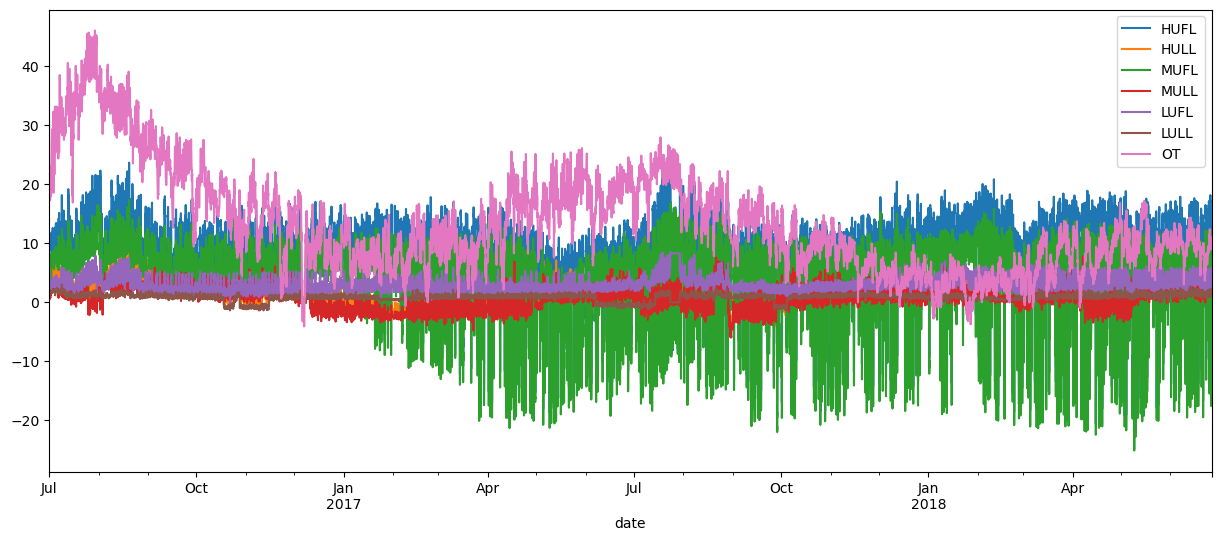

In [175]:
data.set_index('date').plot(figsize=(15, 6))

In [169]:
features = data.columns[1:]
mean_dict = train_data.mean().to_dict()
std_dict = train_data.std().to_dict()
statistics = {'mean': mean_dict, 'std': std_dict}
with open("statistics.pkl", "wb") as f:
    pickle.dump(statistics, f)

for col in features:
    data[col] = (data[col] - mean_dict[col]) / std_dict[col]

In [153]:
data.to_csv('zscore_data.csv', index=False)